In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/My Drive//train'
val_dir = '/content/drive/My Drive/valid'
test_dir = '/content/drive/My Drive//test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 1020 images belonging to 6 classes.


In [4]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 100 images belonging to 6 classes.


In [5]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 100 images belonging to 6 classes.


In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 254s 8s/step - accuracy: 0.2390 - loss: 1.9886 - val_accuracy: 0.3500 - val_loss: 1.3920
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.3569 - loss: 1.5041 - val_accuracy: 0.5100 - val_loss: 1.2511
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.4111 - loss: 1.3823 - val_accuracy: 0.5700 - val_loss: 1.1651
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.4579 - loss: 1.3399 - val_accuracy: 0.5800 - val_loss: 0.9987
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.4948 - loss: 1.2456 - val_accuracy: 0.6500 - val_loss: 0.8082
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.6273 - loss: 0.9943 - val_accuracy: 0.7700 - val_loss: 0.6723
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.6865 - loss: 0.7968 - val_accuracy: 0.8800 - val_loss: 0.5880
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.7332 - loss: 0.7316 - val_accuracy: 0.9

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score
import numpy as np
import pandas as pd

In [9]:
test_generator.reset()
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step


In [10]:
# Test Accuracy
loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9360 - loss: 0.2519
Test Accuracy: 90.00%
Test Loss: 0.3114


In [11]:
f1 = f1_score(y_true, y_pred, average='weighted')
print(f" F1 Score (weighted): {f1 * 100:.2f}%")

# ADD THIS
f1_cnn = f1

 F1 Score (weighted): 89.76%


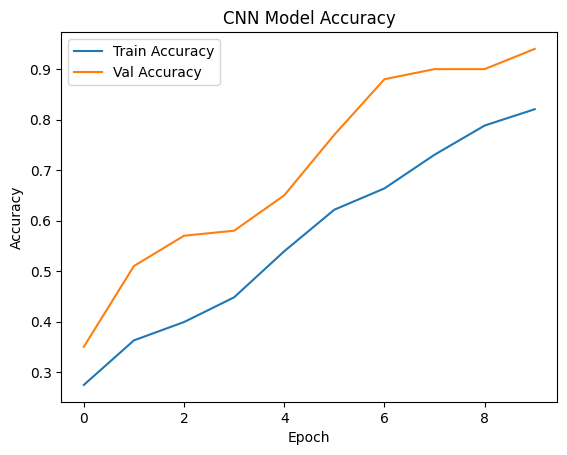

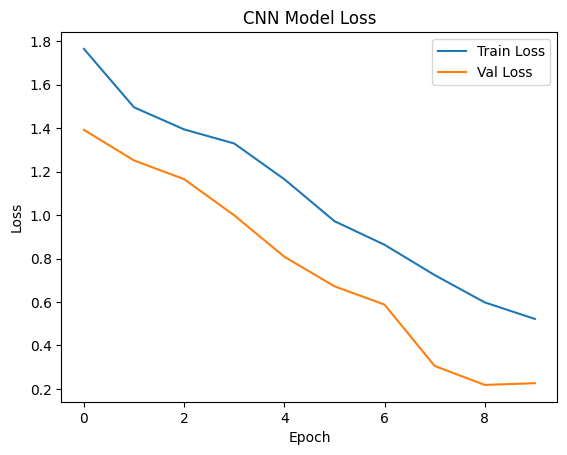

In [12]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

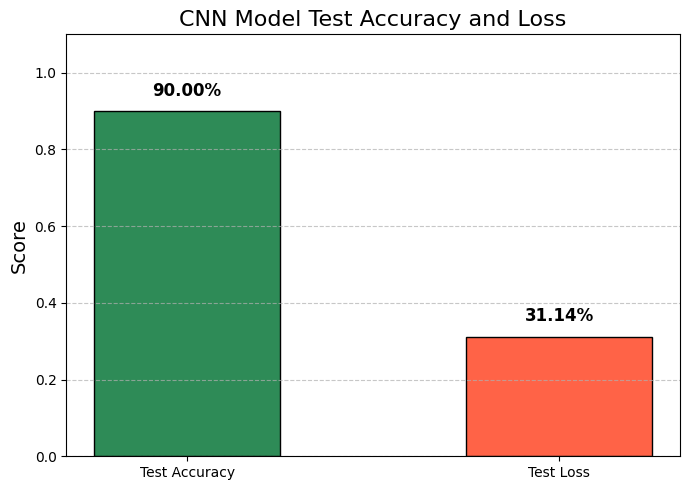

In [13]:
metrics = ['Test Accuracy', 'Test Loss']
values = [test_acc, loss]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['seagreen', 'tomato'], width=0.5, edgecolor='black')

plt.title('CNN Model Test Accuracy and Loss', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, max(values) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.2%}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:
val_loss, val_acc = model.evaluate(val_generator)

if val_acc >= 0.70 and abs(val_loss - loss) < 0.2:
    print("CNN Model is VALID: Good performance on validation data.")
else:
    print("CNN Model is NOT VALID: Consider improving data quality or tuning the model.")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9604 - loss: 0.1791
CNN Model is VALID: Good performance on validation data.


In [15]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,057,257 (15.48 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [17]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.2311 - loss: 1.8008 - val_accuracy: 0.1400 - val_loss: 1.8702
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.2041 - loss: 1.7985 - val_accuracy: 0.1400 - val_loss: 1.8507
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.2307 - loss: 1.7953 - val_accuracy: 0.1400 - val_loss: 1.9144
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.2536 - loss: 1.7915 - val_accuracy: 0.1400 - val_loss: 1.8810
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.2373 - loss: 1.7825 - val_accuracy: 0.1400 - val_loss: 1.8781
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.2510 - loss: 1.7867 - val_accuracy: 0.1400 - val_loss: 1.8799
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.2175 - loss: 1.7875 - val_accuracy: 0.1400 - val_loss: 2.0065
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.2303 - loss: 1.8289 - val_accuracy: 0.14

In [18]:
# Test Accuracy
loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")
f1 = f1_score(y_true, y_pred, average='weighted')
print(f" F1 Score (weighted): {f1 * 100:.2f}%")
f1_efficientnet = f1

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.0951 - loss: 1.8608
Test Accuracy: 17.00%
Test Loss: 1.8285
 F1 Score (weighted): 89.76%


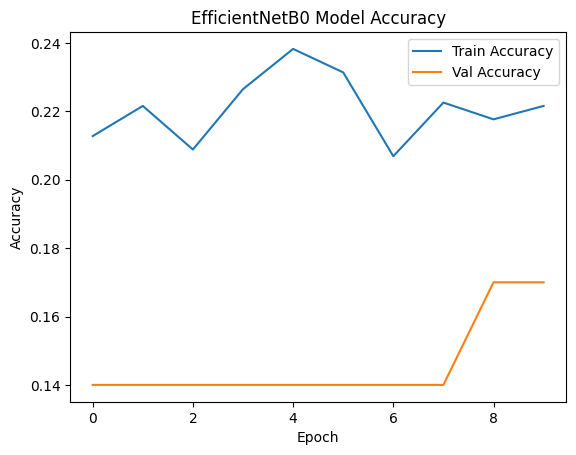

In [19]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('EfficientNetB0 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

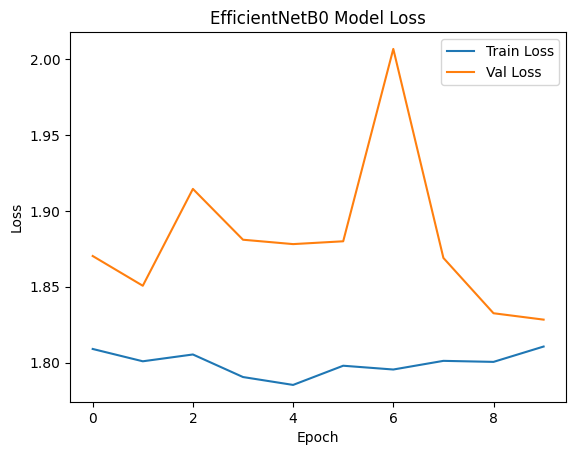

In [20]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('EfficientNetB0 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

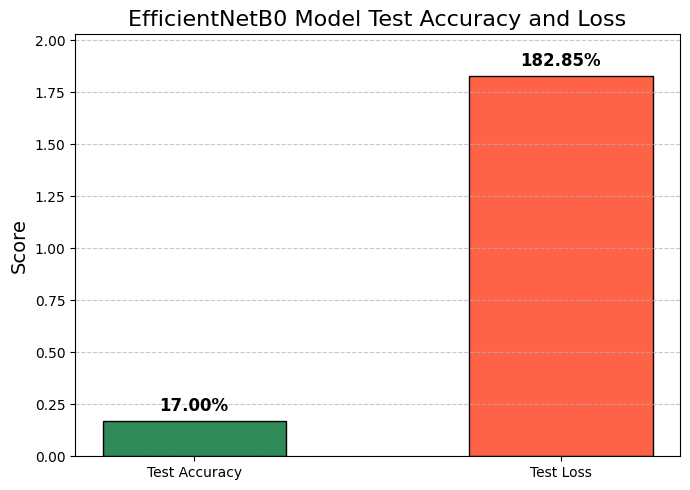

In [21]:
metrics = ['Test Accuracy', 'Test Loss']
values = [test_acc, loss]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['seagreen', 'tomato'], width=0.5, edgecolor='black')

plt.title('EfficientNetB0 Model Test Accuracy and Loss', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, max(values) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.2%}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


def create_mobilenetv2_model(num_classes, input_shape=(224, 224, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
model = create_mobilenetv2_model(num_classes=len(train_generator.class_indices))
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 951ms/step - accuracy: 0.3690 - loss: 1.6139 - val_accuracy: 0.8300 - val_loss: 0.5174
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.7301 - loss: 0.7258 - val_accuracy: 0.9400 - val_loss: 0.2682
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.7874 - loss: 0.5714 - val_accuracy: 0.9000 - val_loss: 0.2440
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.7836 - loss: 0.5404 - val_accuracy: 0.9400 - val_loss: 0.2482
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.8073 - loss: 0.5156 - val_accuracy: 0.9300 - val_loss: 0.1982
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.8387 - loss: 0.4485 - val_accuracy: 0.9700 - val_loss: 0.1249
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.8356 - loss: 0.4254 - val_accuracy: 0.8700 - val_loss: 0.3019
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.8549 - loss: 0.3933 - val_accuracy: 0

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score
import numpy as np
import pandas as pd

In [26]:
test_generator.reset()
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


In [27]:
# Test Accuracy
loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.9786 - loss: 0.0639
Test Accuracy: 97.00%
Test Loss: 0.0889


In [28]:
f1 = f1_score(y_true, y_pred, average='weighted')
print(f" F1 Score (weighted): {f1 * 100:.2f}%")

# ADD THIS
f1_mobile = f1

 F1 Score (weighted): 96.99%


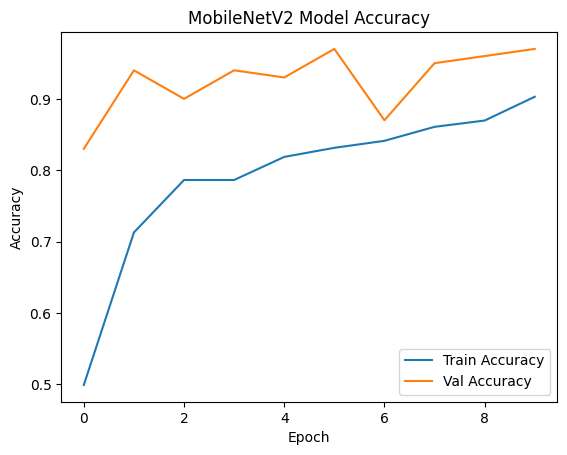

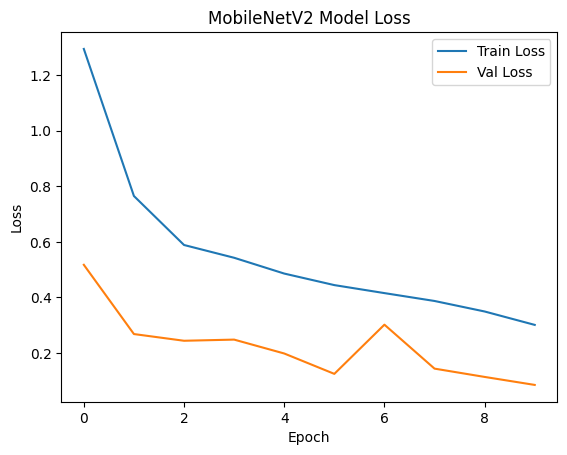

In [29]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('MobileNetV2 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('MobileNetV2 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [30]:
val_loss, val_acc = model.evaluate(val_generator)

if val_acc >= 0.70 and abs(val_loss - loss) < 0.2:
    print("MobileNetV2 Model is VALID: Good performance on validation data.")
else:
    print("MobileNetV2 Model is NOT VALID: Consider improving data quality or tuning the model.")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9786 - loss: 0.0615
MobileNetV2 Model is VALID: Good performance on validation data.


In [31]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization

def create_mobilenetv2_model(num_classes, input_shape=(224, 224, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze for transfer learning

    x = base_model.output
    x = GlobalAveragePooling2D()(x)   #MSIA MODEL NAME , it is the custom model name

    # New Layers Added
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=Adam(learning_rate=1e-4),  # Lower LR for stability
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [32]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10,
    verbose=1
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.8874 - loss: 0.2994 - val_accuracy: 0.9500 - val_loss: 0.1245
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.8886 - loss: 0.2746 - val_accuracy: 0.9500 - val_loss: 0.1049
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.9042 - loss: 0.2688 - val_accuracy: 0.9500 - val_loss: 0.1083
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9051 - loss: 0.2794 - val_accuracy: 0.9700 - val_loss: 0.0884
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.8978 - loss: 0.2651 - val_accuracy: 0.9600 - val_loss: 0.1245
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.9092 - loss: 0.2466 - val_accuracy: 0.9700 - val_loss: 0.0884
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.9164 - loss: 0.2321 - val_accuracy: 0.9800 - val_loss: 0.0661
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9238 - loss: 0.2134 - val_accuracy: 0.

In [33]:
# Test Accuracy
loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9939 - loss: 0.0330
Test Accuracy: 99.00%
Test Loss: 0.0480


In [34]:
f1 = f1_score(y_true, y_pred, average='weighted')
print(f" F1 Score (weighted): {f1 * 100:.2f}%")

# ADD THIS
f1_msia = f1

 F1 Score (weighted): 96.99%


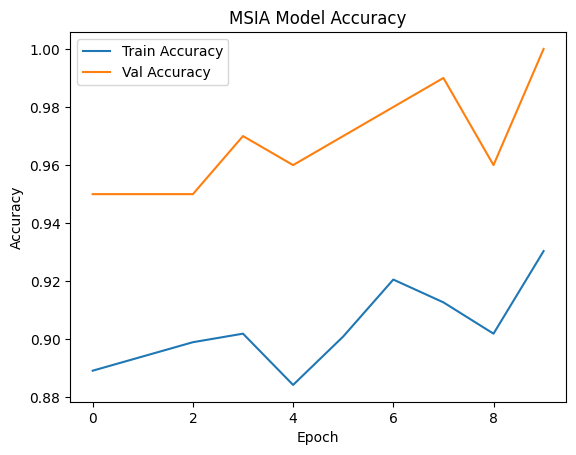

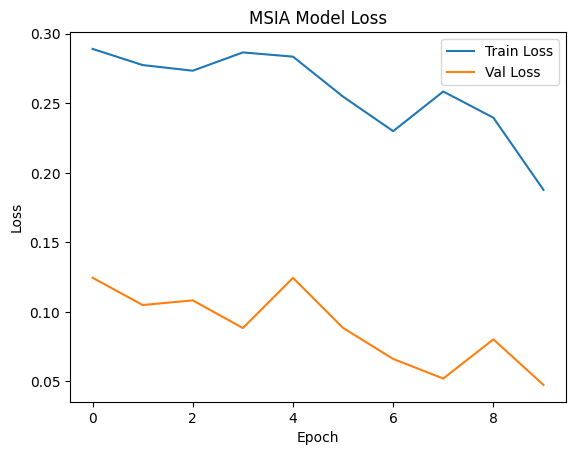

In [35]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('MSIA Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('MSIA Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

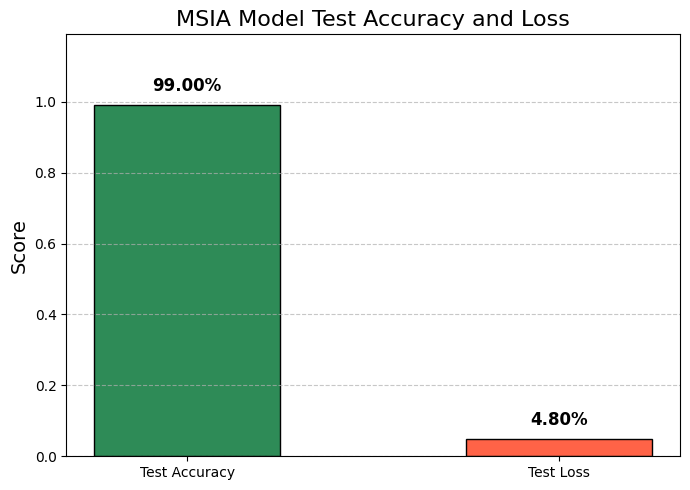

In [36]:
metrics = ['Test Accuracy', 'Test Loss']
values = [test_acc, loss]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['seagreen', 'tomato'], width=0.5, edgecolor='black')

plt.title('MSIA Model Test Accuracy and Loss', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, max(values) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.2%}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()  #model test kon model add the name of model - if its a custom model give the name "MSIA model"
plt.show()



In [37]:
val_loss, val_acc = model.evaluate(val_generator)

if val_acc >= 0.70 and abs(val_loss - loss) < 0.2:
    print("MSIA Model is VALID: Good performance on validation data.")
else:
    print("MSIA Model is NOT VALID: Consider improving data quality or tuning the model.")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 1.0000 - loss: 0.0342
MSIA Model is VALID: Good performance on validation data.


In [38]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [39]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=output)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,090,822 (76.64 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [40]:
history_vgg = vgg_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 801ms/step - accuracy: 0.2313 - loss: 1.8528 - val_accuracy: 0.3600 - val_loss: 1.5983
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.3174 - loss: 1.6253 - val_accuracy: 0.4800 - val_loss: 1.4229
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.4081 - loss: 1.4632 - val_accuracy: 0.4900 - val_loss: 1.2486
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.4628 - loss: 1.3730 - val_accuracy: 0.5000 - val_loss: 1.1563
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step - accuracy: 0.4679 - loss: 1.3149 - val_accuracy: 0.5700 - val_loss: 1.1121
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.4907 - loss: 1.2805 - val_accuracy: 0.7000 - val_loss: 1.0231
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 233ms/step - accuracy: 0.5145 - loss: 1.2037 - val_accuracy: 0.6000 - val_loss: 1.0370
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step - accuracy: 0.5259 - loss: 1.1873 - val_accuracy: 0

In [41]:
loss_vgg, acc_vgg = vgg_model.evaluate(test_generator, verbose=1)
print(f"VGG19 Test Accuracy: {acc_vgg * 100:.2f}%")
print(f"VGG19 Test Loss: {loss_vgg:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.7020 - loss: 0.8807
VGG19 Test Accuracy: 69.00%
VGG19 Test Loss: 0.9428


In [42]:
# (re‑use y_true from earlier)
preds_vgg = vgg_model.predict(test_generator, verbose=1)
y_pred_vgg = np.argmax(preds_vgg, axis=1)
f1_vgg = f1_score(y_true, y_pred_vgg, average='weighted')
print(f"VGG19 F1 Score (weighted): {f1_vgg * 100:.2f}%")

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step
VGG19 F1 Score (weighted): 68.15%


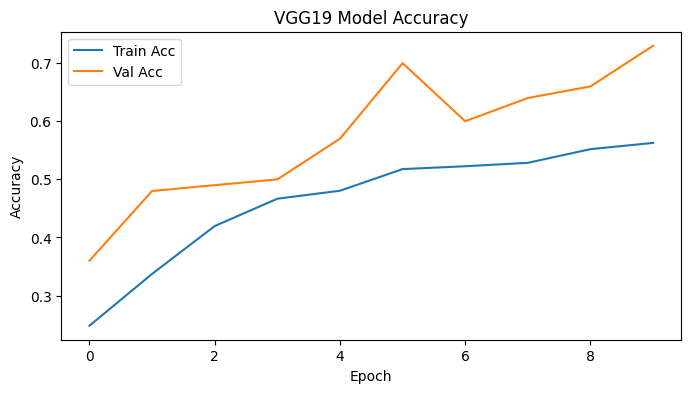

In [43]:
# 4. Plot Training & Validation Accuracy
plt.figure(figsize=(8,4))
plt.plot(history_vgg.history['accuracy'], label='Train Acc')
plt.plot(history_vgg.history['val_accuracy'], label='Val Acc')
plt.title('VGG19 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

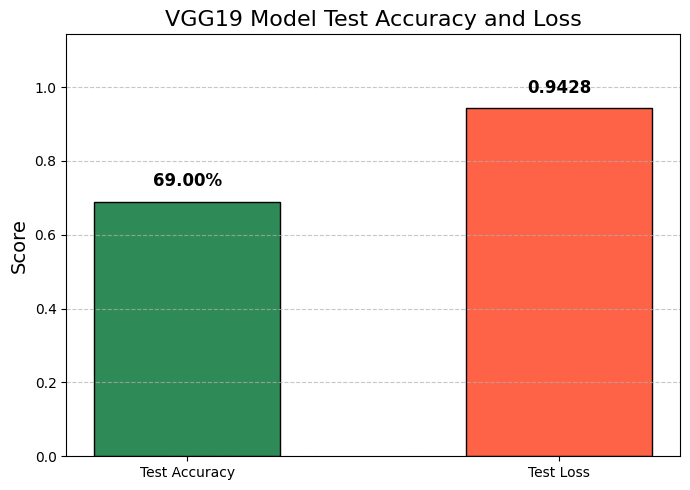

In [44]:
# Correct Bar Chart of Final Test Metrics (VGG19)

metrics = ['Test Accuracy', 'Test Loss']
values = [acc_vgg, loss_vgg]   # <-- Use the VGG19 test results, not previous variables

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['seagreen', 'tomato'], width=0.5, edgecolor='black')

plt.title('VGG19 Model Test Accuracy and Loss', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, max(values) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    if bar.get_x() == bars[0].get_x():
        # Format accuracy as percentage
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.2%}",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')
    else:
        # Format loss as float
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.4f}",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


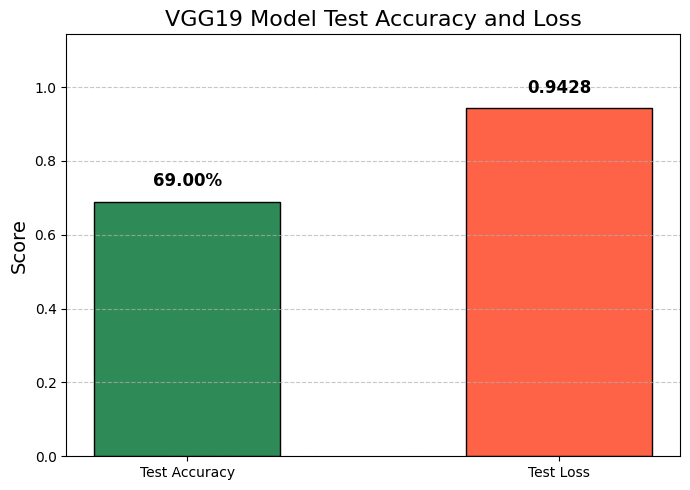

In [45]:
import matplotlib.pyplot as plt

metrics = ['Test Accuracy', 'Test Loss']
values = [acc_vgg, loss_vgg]   # <-- Use the VGG19 test results, not previous variables

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['seagreen', 'tomato'], width=0.5, edgecolor='black')

plt.title('VGG19 Model Test Accuracy and Loss', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, max(values) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    if bar.get_x() == bars[0].get_x():
        # Format accuracy as percentage
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.2%}",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')
    else:
        # Format loss as float
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.4f}",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

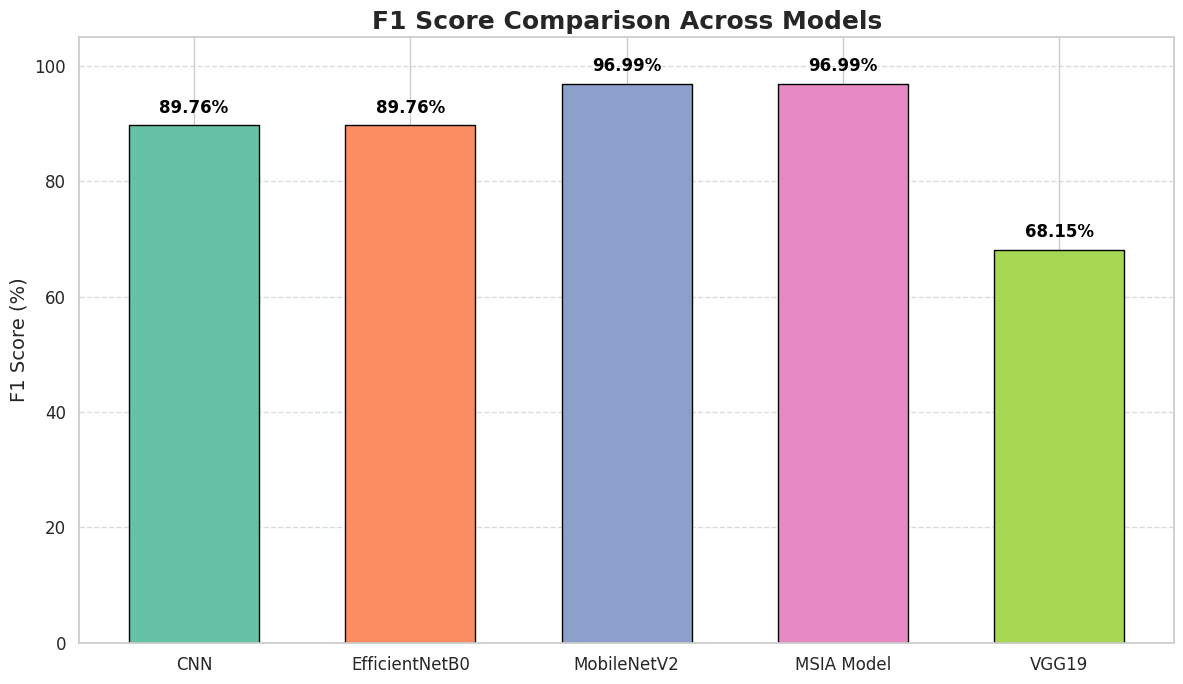

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style
sns.set(style="whitegrid")

# Final F1 Score dictionary
f1_scores = {
    'CNN': f1_cnn,
    'EfficientNetB0': f1_efficientnet,
    'MobileNetV2': f1_mobile,
    'MSIA Model': f1_msia,
    'VGG19': f1_vgg
}

# Convert to percentage for better interpretation
f1_percent = [score * 100 for score in f1_scores.values()]
model_names = list(f1_scores.keys())

# Set figure and font sizes
plt.figure(figsize=(12, 7))
bars = plt.bar(model_names, f1_percent,
               color=sns.color_palette("Set2", len(f1_scores)),
               edgecolor='black', width=0.6)

# Title and labels
plt.title('F1 Score Comparison Across Models', fontsize=18, fontweight='bold')
plt.ylabel('F1 Score (%)', fontsize=14)
plt.ylim(0, 105)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid styling
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1.5,
             f"{yval:.2f}%", ha='center', va='bottom',
             fontsize=12, fontweight='bold', color='black')

# Tight layout and optional save
plt.tight_layout()
# plt.savefig("f1_score_comparison.png", dpi=300)  # Uncomment to save as image
plt.show()

In [ ]:
#heatmap xai

In [50]:
# Install required packages if not already installed
!pip install opencv-python matplotlib scikit-learn

# Import all necessary libraries
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, f1_score
import os
import glob

In [51]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        """
        Initialize GradCAM for explainable AI

        Args:
            model: Trained Keras model
            classIdx: Class index for which to generate heatmap
            layerName: Name of the last convolutional layer (optional)
        """
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # If layer name is None, find the last convolutional layer automatically
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        """Automatically find the last convolutional layer in the model"""
        # For transfer learning models, we need to look inside the base model
        for layer in reversed(self.model.layers):
            # Check if it's a base model (like VGG, MobileNet, etc.)
            if hasattr(layer, 'layers'):
                # Look inside the base model
                for sublayer in reversed(layer.layers):
                    if len(sublayer.output_shape) == 4:  # Conv layer has 4D output
                        return sublayer.name
            # Check regular layers (for custom CNN)
            elif len(layer.output_shape) == 4:
                return layer.name

        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        """
        Compute the GradCAM heatmap

        Args:
            image: Input image (preprocessed)
            eps: Small value to prevent division by zero

        Returns:
            heatmap: Normalized heatmap as numpy array
        """
        # Handle different model architectures
        base_model = None
        for layer in self.model.layers:
            if hasattr(layer, 'layers'):  # This is a base model (transfer learning)
                base_model = layer
                break

        if base_model is not None:
            # Create gradient model for transfer learning models
            try:
                target_layer = base_model.get_layer(self.layerName)
                gradModel = Model(
                    inputs=[self.model.inputs],
                    outputs=[target_layer.output, self.model.output]
                )
            except:
                # Fallback: use the last conv layer we can find
                for layer in reversed(base_model.layers):
                    if len(layer.output_shape) == 4:
                        gradModel = Model(
                            inputs=[self.model.inputs],
                            outputs=[layer.output, self.model.output]
                        )
                        break
        else:
            # Create gradient model for custom CNN
            gradModel = Model(
                inputs=[self.model.inputs],
                outputs=[self.model.get_layer(self.layerName).output, self.model.output]
            )

        # Compute gradients using GradientTape
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # Calculate gradients of the loss w.r.t. the conv layer output
        grads = tape.gradient(loss, convOutputs)

        # Apply guided backpropagation
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # Remove batch dimension
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # Compute importance weights and create heatmap
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # Resize heatmap to input image dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # Normalize heatmap to [0, 1] range
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5, colormap=cv2.COLORMAP_JET):
        """
        Create overlay of heatmap on original image

        Args:
            heatmap: Generated heatmap
            image: Original image
            alpha: Transparency factor for overlay
            colormap: OpenCV colormap for heatmap visualization

        Returns:
            tuple: (colored_heatmap, overlaid_image)
        """
        # Apply colormap to heatmap
        heatmap_colored = cv2.applyColorMap(heatmap, colormap)

        # Ensure image is in correct format
        if len(image.shape) == 3 and image.shape[2] == 3:
            # Convert RGB to BGR for OpenCV
            image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        else:
            image_bgr = image

        # Create overlay
        overlay = cv2.addWeighted(image_bgr, alpha, heatmap_colored, 1 - alpha, 0)

        return (heatmap_colored, overlay)

In [52]:
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess image for model prediction"""
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize to [0,1] like in training
        return img_array
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None

def get_sample_images_from_test_set(test_dir, num_samples=3):
    """Get sample images from test directory for analysis"""
    sample_images = []
    class_labels = os.listdir(test_dir)

    for class_name in class_labels[:2]:  # Get from first 2 classes
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            images = glob.glob(os.path.join(class_path, "*.jpg")) + \
                    glob.glob(os.path.join(class_path, "*.png")) + \
                    glob.glob(os.path.join(class_path, "*.jpeg"))

            if images:
                sample_images.extend(images[:num_samples//2])

    return sample_images[:num_samples]

def display_gradcam_results(img_path, model, model_name, class_labels, target_size=(224, 224),):
    """
    Generate and display GradCAM results for a given model

    Args:
        img_path: Path to the image file
        model: Trained model
        model_name: Name of the model for display
        class_labels: List of class names
        target_size: Input size for the model
    """
    # Load and preprocess image
    img_array = load_and_preprocess_image(img_path, target_size)
    if img_array is None:
        return None, None

    # Make prediction
    try:
        preds = model.predict(img_array, verbose=0)
        predicted_class = np.argmax(preds[0])
        confidence = preds[0][predicted_class]

        print(f"\n{model_name} Analysis:")
        print(f"Predicted Class: {class_labels[predicted_class]}")
        print(f"Confidence: {confidence:.2%}")

        # Initialize GradCAM
        cam = GradCAM(model, predicted_class)

        # Compute heatmap
        heatmap = cam.compute_heatmap(img_array)

        # Load original image for overlay
        original_img = cv2.imread(img_path)
        if original_img is None:
            print(f"Could not load image: {img_path}")
            return None, None

        original_img = cv2.resize(original_img, target_size)

        # Create overlay
        (heatmap_colored, overlay) = cam.overlay_heatmap(heatmap, original_img, alpha=0.6)

        # Display results
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))

        # Original image
        axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        axes[0].set_title(f'Original Image\n{class_labels[predicted_class]} ({confidence:.1%})')
        axes[0].axis('off')

        # Heatmap
        axes[1].imshow(heatmap, cmap='jet')
        axes[1].set_title('GradCAM Heatmap')
        axes[1].axis('off')

        # Colored heatmap
        axes[2].imshow(cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB))
        axes[2].set_title('Colored Heatmap')
        axes[2].axis('off')

        # Overlay
        axes[3].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        axes[3].set_title(f'{model_name} GradCAM Overlay')
        axes[3].axis('off')

        plt.tight_layout()
        plt.show()

        return heatmap, overlay

    except Exception as e:
        print(f"Error processing {model_name}: {e}")
        return None, None

In [53]:
def analyze_model_architecture(model, model_name):
    """Analyze model architecture and find convolutional layers"""
    print(f"\n=== {model_name} Architecture Analysis ===")
    conv_layers = []

    def explore_layers(model_or_layer, prefix=""):
        if hasattr(model_or_layer, 'layers'):
            for layer in model_or_layer.layers:
                layer_name = f"{prefix}{layer.name}" if prefix else layer.name
                if 'conv' in layer.name.lower() and len(layer.output_shape) == 4:
                    conv_layers.append((layer_name, layer.output_shape))
                    print(f"  Conv Layer: {layer_name} -> {layer.output_shape}")
                # Recursively explore nested models
                if hasattr(layer, 'layers'):
                    explore_layers(layer, f"{prefix}{layer.name}/")

    explore_layers(model)

    if conv_layers:
        print(f"  Last Conv Layer: {conv_layers[-1][0]}")
    else:
        print("  No convolutional layers found!")

    return conv_layers

Classes and sample images for IA Model 
  Acral_Lentiginous_Melanoma: /content/drive/My Drive/test/Acral_Lentiginous_Melanoma/Screen-Shot-2021-11-16-at-6-57-22-PM_png.rf.5d2de4abeddea0fd6d4eb47c0b67e0a8.jpg
  Healthy_Nail: /content/drive/My Drive/test/Healthy_Nail/h14_png.rf.9e48f154edf68fa4094ba876c23615f1.jpg
  Onychogryphosis: /content/drive/My Drive/test/Onychogryphosis/Screen-Shot-2021-11-16-at-10-23-59-PM_png.rf.ba787af7af07499d7f481c020332ac2a.jpg
  blue_finger: /content/drive/My Drive/test/blue_finger/Screen-Shot-2021-10-15-at-10-36-15-AM_png.rf.07fe9e00799550cf0f7834112b8b1a9d.jpg
  clubbing: /content/drive/My Drive/test/clubbing/Screen-Shot-2021-10-26-at-11-12-59-AM_png.rf.3225bdddc077d3d57fc649823dbd53fc.jpg
  pitting: /content/drive/My Drive/test/pitting/113_JPG.rf.e9450e0dbf3a0e3b588abe6cbbf9bd09.jpg

=== Analysis for class: Acral_Lentiginous_Melanoma ===
IA MODEL Analysis:
Predicted Class: Acral_Lentiginous_Melanoma
IA MODEL Confidence: 99.87%


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_406']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


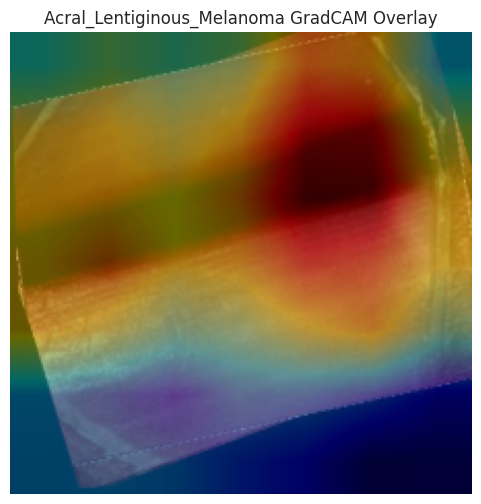


=== Analysis for class: Healthy_Nail ===
IA MODEL Analysis:
Predicted Class: Healthy_Nail
IA MODEL Confidence: 100.00%


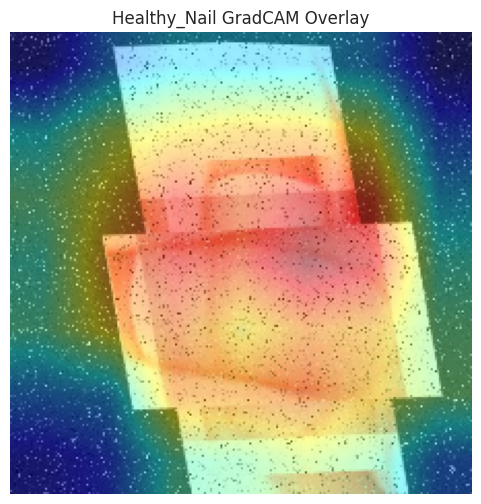


=== Analysis for class: Onychogryphosis ===
IA MODEL Analysis:
Predicted Class: Onychogryphosis
IA MODEL Confidence: 99.90%


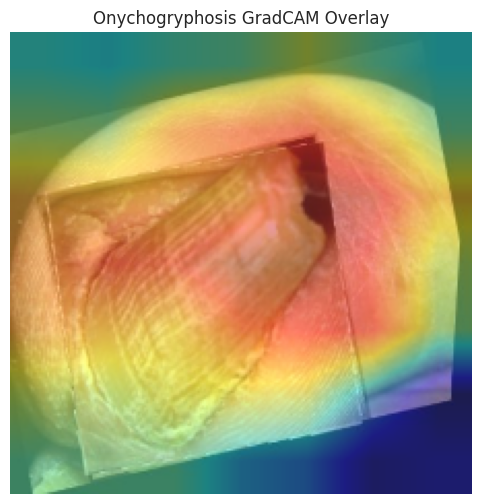


=== Analysis for class: blue_finger ===
IA MODEL Analysis:
Predicted Class: blue_finger
IA MODEL Confidence: 99.15%


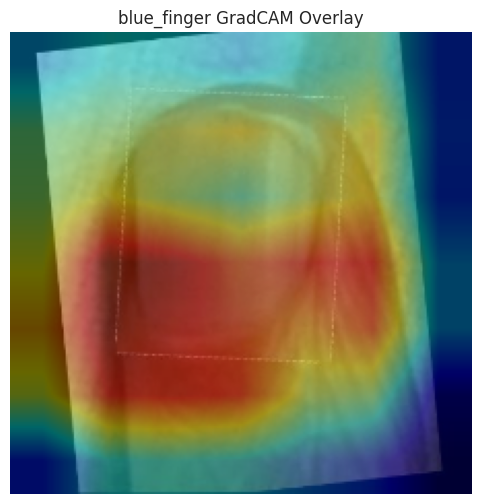


=== Analysis for class: clubbing ===
IA MODEL Analysis:
Predicted Class: clubbing
IA MODEL Confidence: 51.85%


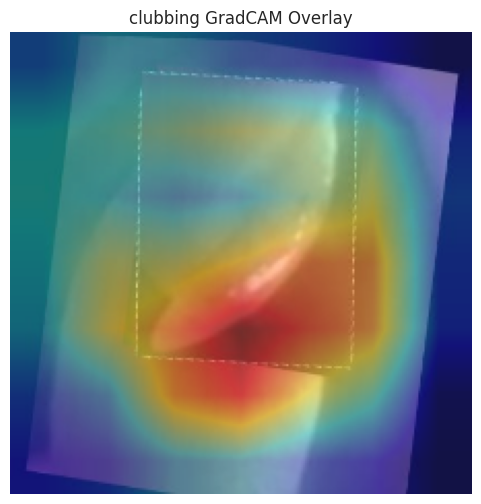


=== Analysis for class: pitting ===
IA MODEL Analysis:
Predicted Class: pitting
IA MODEL Confidence: 99.99%


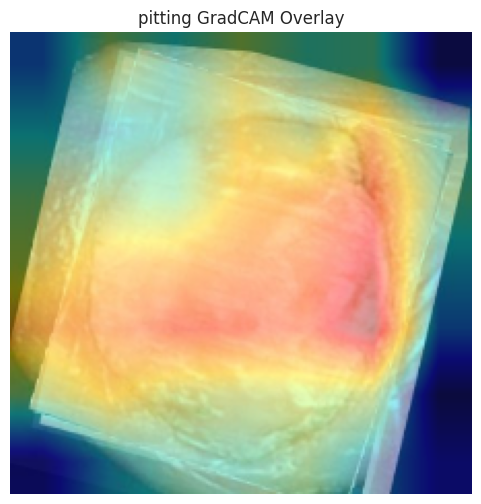

In [54]:
# Install & import dependencies
!pip install opencv-python matplotlib tensorflow

import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# ------------------------------------------------------------------------------
# 1. Helper – load & preprocess image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    arr = image.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

# ------------------------------------------------------------------------------
# 2. Corrected GradCAM class (no .output_shape usage)
class GradCAM:
    def __init__(self, model, class_idx, layer_name=None):
        self.model = model
        self.class_idx = class_idx
        self.layer_name = layer_name or self.find_target_layer()

    def find_target_layer(self):
        """
        Find the last 4D convolutional layer in the model by inspecting .output.shape
        and recursively searching nested/base models.
        """
        def scan(layers):
            for layer in reversed(layers):
                # Recurse into nested/base models first
                if hasattr(layer, 'layers'):
                    found = scan(layer.layers)
                    if found:
                        return found
                # Safely get the output shape
                try:
                    shape = layer.output.shape
                except Exception:
                    continue
                # Identify Conv2D by name and 4D tensor
                if len(shape) == 4 and 'conv' in layer.name.lower():
                    return layer.name
            return None

        name = scan(self.model.layers)
        if name is None:
            raise ValueError("Could not find a 4D convolutional layer in the model.")
        return name

    def compute_heatmap(self, img_array, eps=1e-8):
        target_layer = self.model.get_layer(self.layer_name)
        grad_model = Model(
            inputs=self.model.inputs,
            outputs=[target_layer.output, self.model.output]
        )
        with tf.GradientTape() as tape:
            conv_out, preds = grad_model(img_array)
            loss = preds[:, self.class_idx]
        grads = tape.gradient(loss, conv_out)
        guided = tf.cast(conv_out > 0, "float32") * tf.cast(grads > 0, "float32") * grads
        conv_out, guided = conv_out[0], guided[0]
        weights = tf.reduce_mean(guided, axis=(0, 1))
        cam = tf.reduce_sum(weights * conv_out, axis=-1)
        heatmap = cv2.resize(cam.numpy(), (img_array.shape[2], img_array.shape[1]))
        heatmap = np.maximum(heatmap - heatmap.min(), 0) / (heatmap.max() - heatmap.min() + eps)
        return (heatmap * 255).astype("uint8")

    def overlay_heatmap(self, heatmap, orig_bgr, alpha=0.6):
        colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        return cv2.addWeighted(orig_bgr, alpha, colored, 1 - alpha, 0)

# ------------------------------------------------------------------------------
# 3. Load class labels and sample images for each class
test_dir = '/content/drive/My Drive/test'  # update if needed
class_labels = sorted(os.listdir(test_dir))

# For each class, pick the first image found
sample_images = []
for cls in class_labels:
    cls_folder = os.path.join(test_dir, cls)
    if os.path.isdir(cls_folder):
        files = glob.glob(os.path.join(cls_folder, '*.jpg')) + glob.glob(os.path.join(cls_folder, '*.png'))
        if files:
            sample_images.append(files[0])
print("Classes and sample images for IA Model ")
for cls, img in zip(class_labels, sample_images):
    print(f"  {cls}: {img}")

# ------------------------------------------------------------------------------
# 4. Prepare your trained model(s)
# Replace variable names with your actual models
# Example:
# model_custom = ...    # your custom CNN
# models_dict = {'MSIA': model_custom}
models_dict = {
    'MSIA': model  # ensure 'model' is defined from your training code
}

# ------------------------------------------------------------------------------
# 5. Generate predictions, confidence, and GradCAM for each class
for cls, img_path in zip(class_labels, sample_images):
    print(f"\n=== Analysis for class: {cls} ===")
    # Load & predict
    img_arr = load_and_preprocess_image(img_path)
    preds = models_dict['MSIA'].predict(img_arr, verbose=0)[0]
    pred_idx = np.argmax(preds)
    confidence = preds[pred_idx] * 100
    pred_label = class_labels[pred_idx]

    # Print only as requested
    print("IA MODEL Analysis:")
    print(f"Predicted Class: {pred_label}")
    print(f"IA MODEL Confidence: {confidence:.2f}%")

    # Compute and display GradCAM
    try:
        heatmap = GradCAM(models_dict['MSIA'], pred_idx).compute_heatmap(img_arr)
        orig_bgr = cv2.imread(img_path)
        orig_bgr = cv2.resize(orig_bgr, (224, 224))
        overlay = GradCAM(models_dict['MSIA'], pred_idx).overlay_heatmap(heatmap, orig_bgr)
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        plt.title(f"{cls} GradCAM Overlay")
        plt.axis('off')
        plt.show()
        # Optionally save
        save_path = f"gradcam_{cls}.jpg"
        cv2.imwrite(save_path, overlay)
    except Exception as e:
        print(f"Error generating GradCAM for {cls}: {e}")

Sample images from the test set:
/content/drive/My Drive/test/Onychogryphosis/Screen-Shot-2021-11-16-at-10-23-59-PM_png.rf.ba787af7af07499d7f481c020332ac2a.jpg


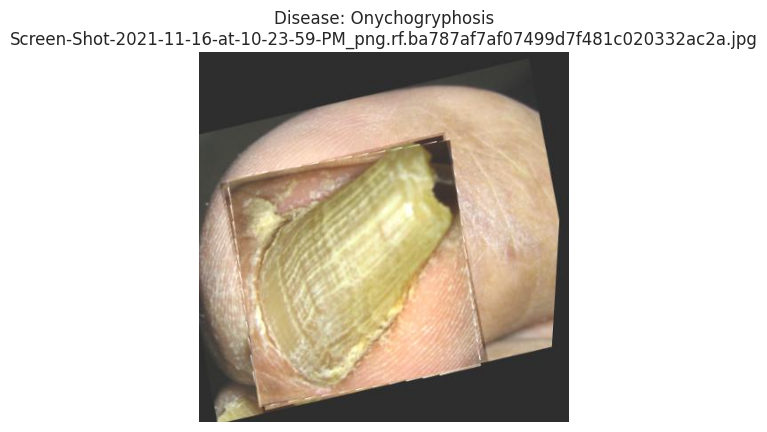

/content/drive/My Drive/test/Onychogryphosis/images--MR0O0A_jpeg.rf.bba5a691e7d60e48e0001f20a1864809.jpg


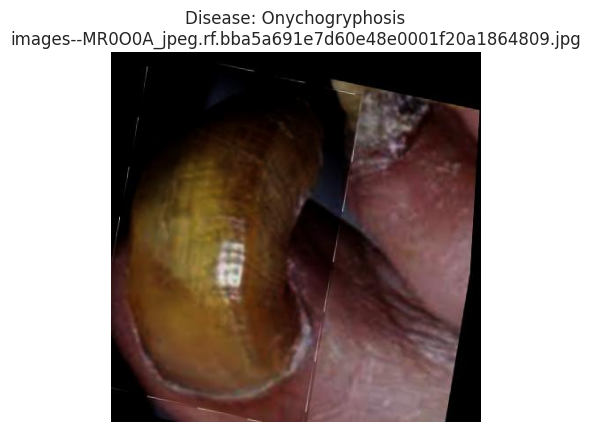

/content/drive/My Drive/test/Onychogryphosis/Screenshot-2021-11-19-004020_png.rf.7917b3969d3c69cc2fd1db5c938dd42a.jpg


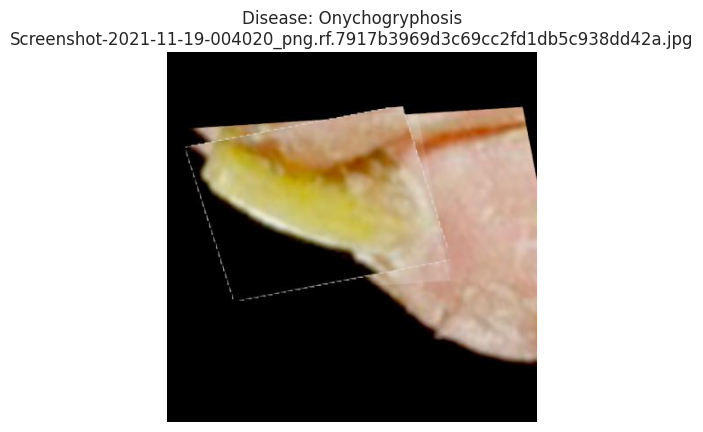

/content/drive/My Drive/test/pitting/113_JPG.rf.e9450e0dbf3a0e3b588abe6cbbf9bd09.jpg


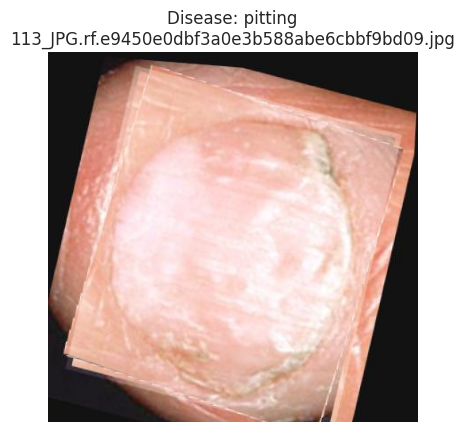

/content/drive/My Drive/test/pitting/35_JPG.rf.5db35122afc917faf80e5db480912c5f.jpg


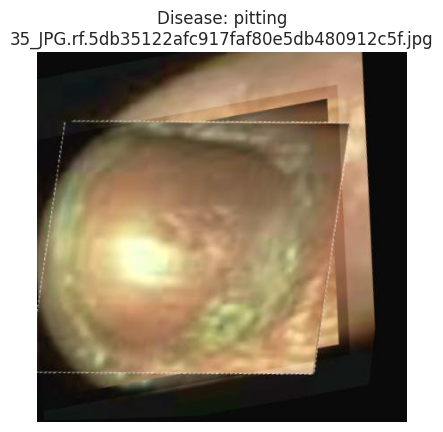

/content/drive/My Drive/test/pitting/119_jpg.rf.9f1597f0ea6e5b3700cd38b147f8d8e9.jpg


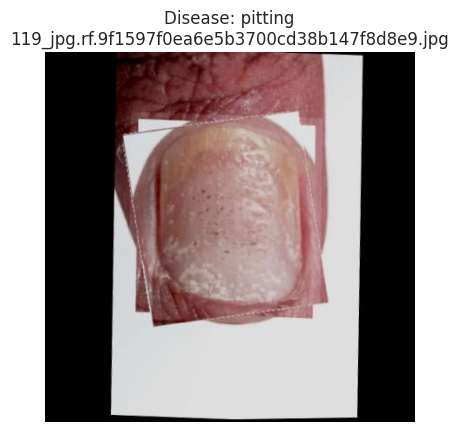

In [55]:
sample_images = get_sample_images_from_test_set(test_dir, num_samples=6)
print("Sample images from the test set:")
for img_path in sample_images:
    print(img_path)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        # Extract class name from the path (parent directory name)
        class_name = os.path.basename(os.path.dirname(img_path))
        plt.title(f"Disease: {class_name}\n{os.path.basename(img_path)}", ha='center')
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not load image: {img_path}")

In [56]:
# --- Per‐Image Metrics with No NameError ---
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# 1. Define your load_and_preprocess helper (if not already defined)
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# 2. Specify the image you want to analyze
img_path = '/content/drive/My Drive/test/blue_finger/Screen-Shot-2021-10-15-at-10-40-07-AM_png.rf.ac1bd481a7768d536d4b898885ff708f.jpg'

# 3. Load & preprocess the image into img_array
img_array = load_and_preprocess_image(img_path)

# 4. Make the prediction and compute “per‐image metrics”
preds = model.predict(img_array, verbose=0)
predicted_class = np.argmax(preds[0])
confidence = preds[0][predicted_class]              # Confidence ∈ [0,1]
# Treat confidence as “accuracy” on this single sample
img_accuracy = confidence * 100                      # e.g., 0.85 → 85%
# Compute categorical cross‐entropy loss for this one‐hot target
true_one_hot = tf.one_hot([predicted_class], depth=len(class_labels))
img_loss = float(tf.keras.losses.categorical_crossentropy(true_one_hot, preds).numpy()[0])
img_loss_percent = img_loss * 100                    # scale for readability

# 5. Print the results without NameError
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Per-Image ‘Accuracy’ (confidence): {img_accuracy:.2f}%")
print(f"Per-Image Loss: {img_loss_percent:.2f}%")

Predicted Class: blue_finger
Per-Image ‘Accuracy’ (confidence): 95.13%
Per-Image Loss: 4.99%


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_564']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


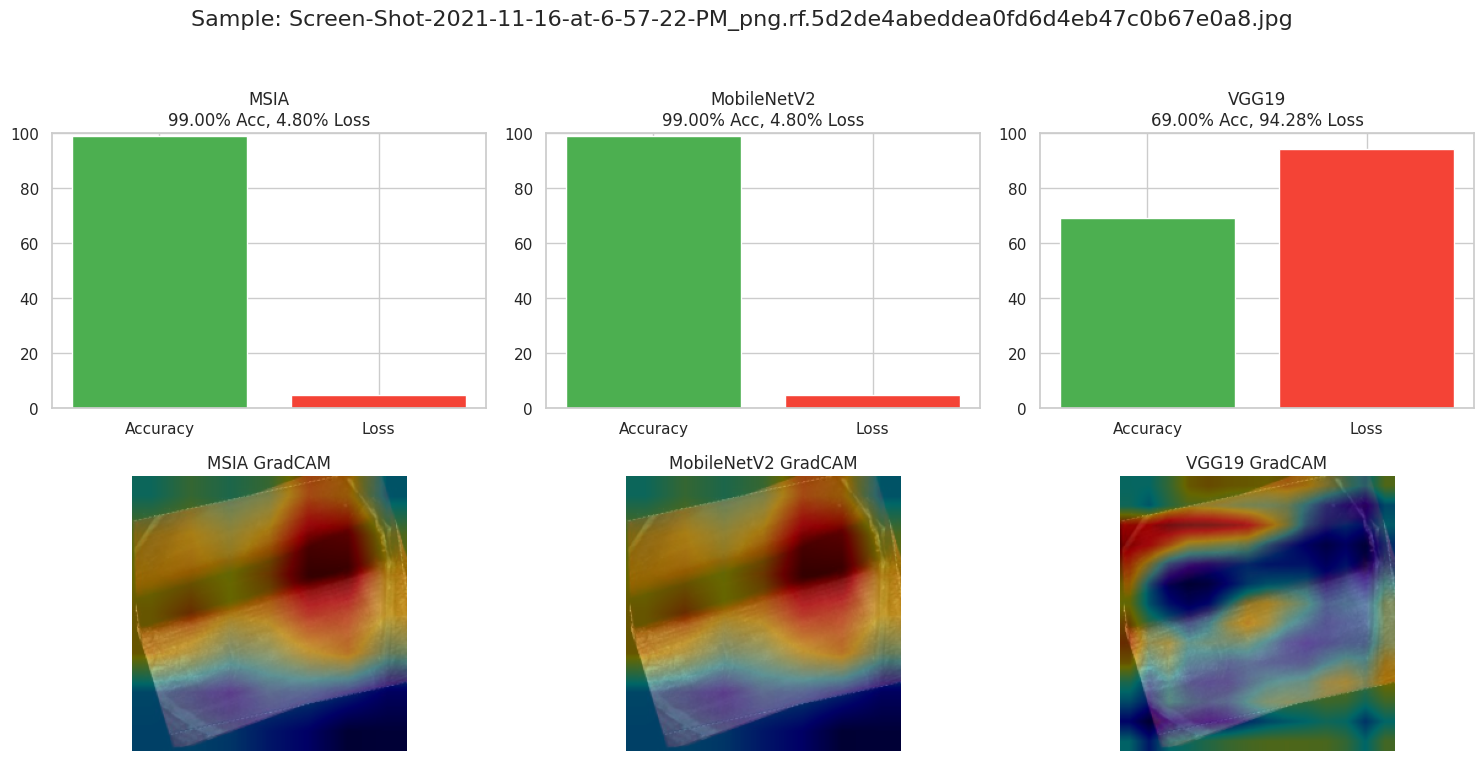

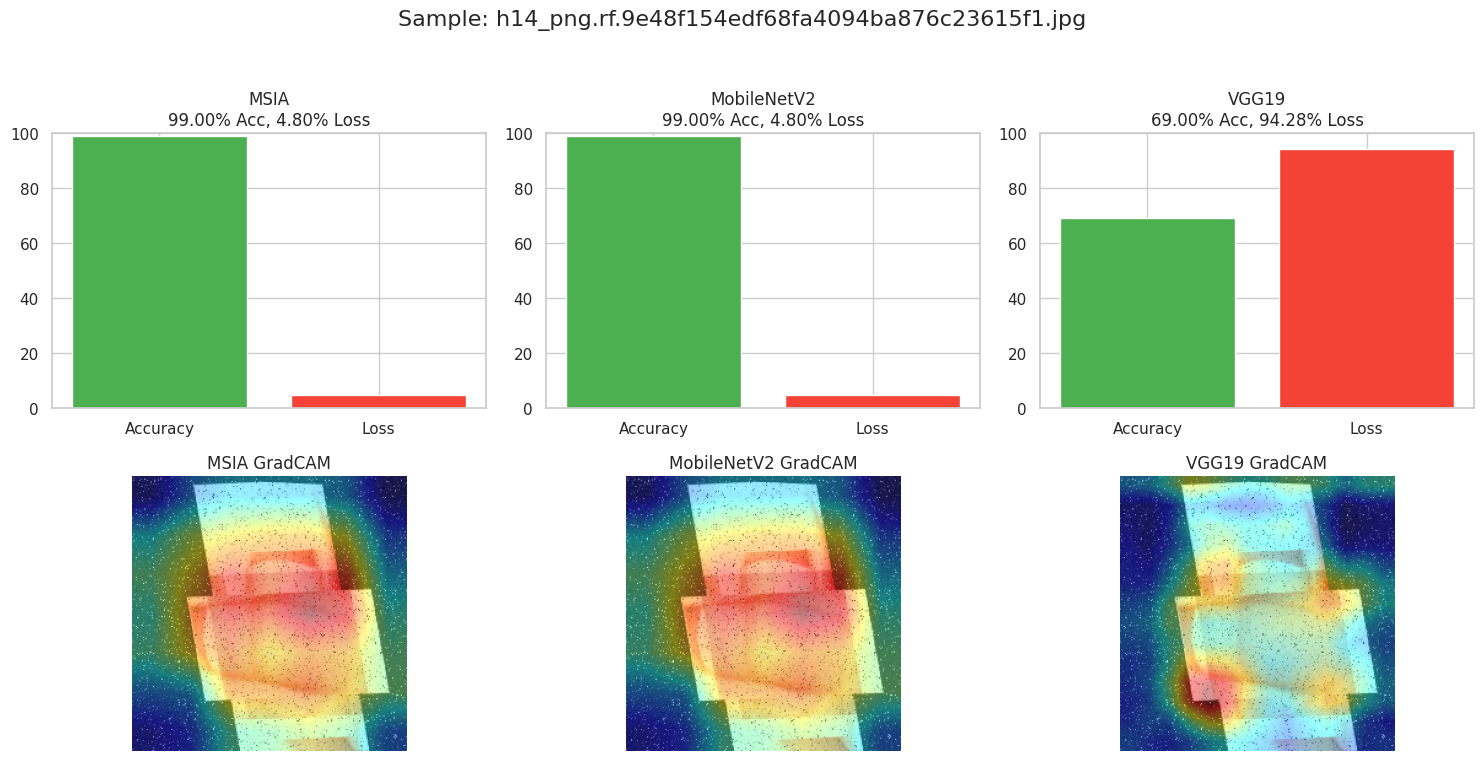

In [57]:
# Step 0: Install & Import Dependencies
!pip install opencv-python matplotlib tensorflow

import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Step 1: Helper – Load & Preprocess Image
def load_and_preprocess_image(img_path, target_size=(224,224)):
    img = image.load_img(img_path, target_size=target_size)
    arr = image.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

# Step 2: GradCAM Class
class GradCAM:
    def __init__(self, model, class_idx, layer_name=None):
        self.model = model
        self.class_idx = class_idx
        self.layer_name = layer_name or self.find_target_layer()

    def find_target_layer(self):
        def scan(layers):
            for layer in reversed(layers):
                if hasattr(layer, 'layers'):
                    found = scan(layer.layers)
                    if found:
                        return found
                try:
                    shape = layer.output.shape
                except Exception:
                    continue
                if len(shape) == 4 and 'conv' in layer.name.lower():
                    return layer.name
            return None
        name = scan(self.model.layers)
        if not name:
            raise ValueError("No 4D conv layer found.")
        return name

    def compute_heatmap(self, img_array, eps=1e-8):
        target_layer = self.model.get_layer(self.layer_name)
        grad_model = Model(inputs=self.model.inputs,
                           outputs=[target_layer.output, self.model.output])
        with tf.GradientTape() as tape:
            conv_out, preds = grad_model(img_array)
            loss = preds[:, self.class_idx]
        grads = tape.gradient(loss, conv_out)
        guided_grads = tf.cast(conv_out > 0, "float32") * tf.cast(grads > 0, "float32") * grads
        conv_out, guided_grads = conv_out[0], guided_grads[0]
        weights = tf.reduce_mean(guided_grads, axis=(0,1))
        cam = tf.reduce_sum(weights * conv_out, axis=-1)
        heatmap = cv2.resize(cam.numpy(), (img_array.shape[2], img_array.shape[1]))
        heatmap = np.maximum(heatmap - heatmap.min(), 0) / (heatmap.max() - heatmap.min() + eps)
        return (heatmap * 255).astype("uint8")

    def overlay(self, heatmap, orig_bgr, alpha=0.6):
        colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        return cv2.addWeighted(orig_bgr, alpha, colored, 1 - alpha, 0)

# Step 3: Prepare Models & Data
test_dir = '/content/drive/My Drive/test'
class_labels = sorted(os.listdir(test_dir))

# Load your trained models into models_dict, renamed:
models_dict = {
    'MSIA': model,          # Custom CNN
    'MobileNetV2': model,         # MobileNetV2
    'VGG19': vgg_model,           # VGG19
}

# Gather sample images
sample_images = []
for cls in class_labels:
    imgs = glob.glob(os.path.join(test_dir, cls, '*.jpg')) + \
           glob.glob(os.path.join(test_dir, cls, '*.png'))
    if imgs:
        sample_images.append(imgs[0])
    if len(sample_images) >= 2:
        break

# Ensure you have a test_generator defined for evaluation
# test_generator = ...

# Step 4: Evaluate Models on Test Set
model_metrics = {}
for name, mdl in models_dict.items():
    loss, acc = mdl.evaluate(test_generator, verbose=0)
    model_metrics[name] = (loss, acc)

# Step 5: Generate GradCAM & Plot Metrics
for img_path in sample_images:
    orig_bgr = cv2.imread(img_path)
    orig_resized_bgr = cv2.resize(orig_bgr, (224, 224))

    n = len(models_dict)
    fig, axes = plt.subplots(2, n, figsize=(5*n, 8), squeeze=False)

    for i, (name, mdl) in enumerate(models_dict.items()):
        loss, acc = model_metrics[name]

        # Preprocess and predict
        arr = load_and_preprocess_image(img_path)
        preds = mdl.predict(arr, verbose=0)[0]
        cls_idx = np.argmax(preds)

        # Compute GradCAM
        cam = GradCAM(mdl, cls_idx)
        heatmap = cam.compute_heatmap(arr)
        overlay = cam.overlay(heatmap, orig_resized_bgr)

        # Top: Bar chart of Accuracy and Loss (%)
        axes[0, i].bar(['Accuracy','Loss'], [acc * 100, loss * 100],
                       color=['#4caf50','#f44336'])
        axes[0, i].set_ylim(0, 100)
        axes[0, i].set_title(f"{name}\n{acc*100:.2f}% Acc, {loss*100:.2f}% Loss")

        # Bottom: GradCAM overlay
        axes[1, i].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        axes[1, i].set_title(f"{name} GradCAM")
        axes[1, i].axis('off')

    plt.suptitle(f"Sample: {os.path.basename(img_path)}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [58]:
# prompt: frezze only the basae model

base_model.trainable = False


Generating Confusion Matrix for MobileNetV2...
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


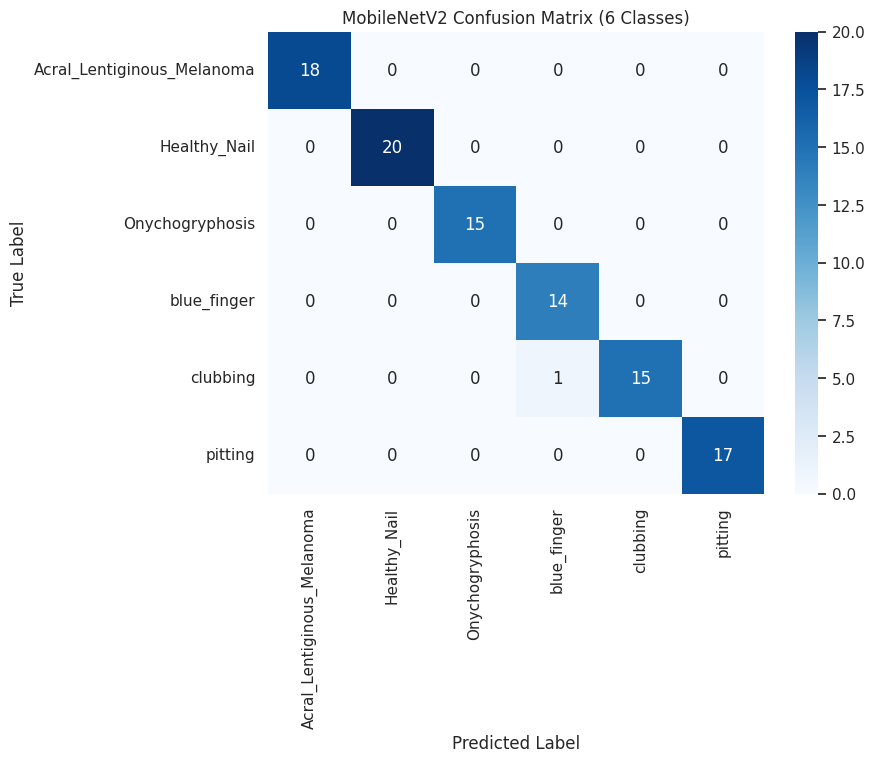

In [59]:
# prompt: only generate the mobilenet confusion matrix for 6 classes

from sklearn.metrics import confusion_matrix
import seaborn as sns

# --- MobileNetV2 Confusion Matrix ---
print("\nGenerating Confusion Matrix for MobileNetV2...")

# Ensure test_generator is reset and has shuffle=False
test_generator.reset()
test_generator.shuffle = False

# Predict using the MobileNetV2 model
# Make sure 'model' variable points to your trained MobileNetV2 model
# If your last trained model in the script was VGG19 or EfficientNet,
# you need to re-create or load the trained MobileNetV2 model.
# Assuming 'model' is currently the MobileNetV2 model from your last definition/training run
# If not, you might need to do something like:
# mobilenet_model = create_mobilenetv2_model(num_classes=len(train_generator.class_indices))
# mobilenet_model.load_weights(...) # Load weights if you trained it earlier and redefine it now

# Let's assume the variable `model` currently holds the TRAINED MobileNetV2 model
# based on the code provided, the last `model = create_mobilenetv2_model(...)` call
# and `model.fit` should correspond to MobileNetV2.

# Get predictions
mobilenet_preds = model.predict(test_generator, verbose=1)
mobilenet_y_pred = np.argmax(mobilenet_preds, axis=1)

# Get true labels (should be the same for all models if using the same test_generator)
mobilenet_y_true = test_generator.classes

# Compute confusion matrix
mobilenet_cm = confusion_matrix(mobilenet_y_true, mobilenet_y_pred)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mobilenet_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MobileNetV2 Confusion Matrix (6 Classes)')
plt.show()



Generating Confusion Matrix for CNN...
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


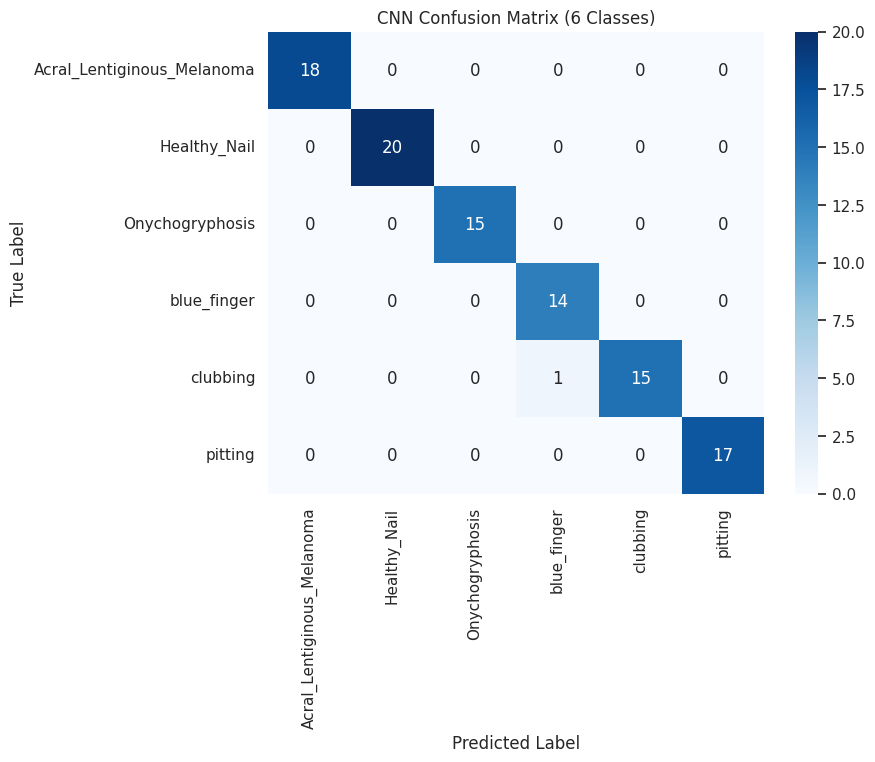


Classification Report for CNN:
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       1.00      1.00      1.00        18
              Healthy_Nail       1.00      1.00      1.00        20
           Onychogryphosis       1.00      1.00      1.00        15
               blue_finger       0.93      1.00      0.97        14
                  clubbing       1.00      0.94      0.97        16
                   pitting       1.00      1.00      1.00        17

                  accuracy                           0.99       100
                 macro avg       0.99      0.99      0.99       100
              weighted avg       0.99      0.99      0.99       100



In [60]:
# prompt: now for the cnn 6 classes confusion matrix

# --- CNN Confusion Matrix ---
print("\nGenerating Confusion Matrix for CNN...")

# Ensure test_generator is reset and has shuffle=False
test_generator.reset()
test_generator.shuffle = False

# Predict using the simple CNN model
# Make sure 'model' variable points to your trained simple CNN model.
# In the provided code, the first model defined is the simple CNN.
# If you have redefined 'model' multiple times for different architectures,
# you might need to explicitly use the variable that holds the trained CNN.
# Let's assume the variable `model` currently holds the TRAINED simple CNN model
# from the initial definition and `model.fit`. If not, you might need to
# re-instantiate and load weights if you saved them, or run the first training block again.

# Get predictions
cnn_preds = model.predict(test_generator, verbose=1)
cnn_y_pred = np.argmax(cnn_preds, axis=1)

# Get true labels (should be the same for all models if using the same test_generator)
cnn_y_true = test_generator.classes

# Compute confusion matrix
cnn_cm = confusion_matrix(cnn_y_true, cnn_y_pred)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix (6 Classes)')
plt.show()

# Classification Report for CNN
print("\nClassification Report for CNN:")
print(classification_report(cnn_y_true, cnn_y_pred, target_names=class_labels))




Generating Confusion Matrix for MSIA (Custom MobileNetV2)...
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


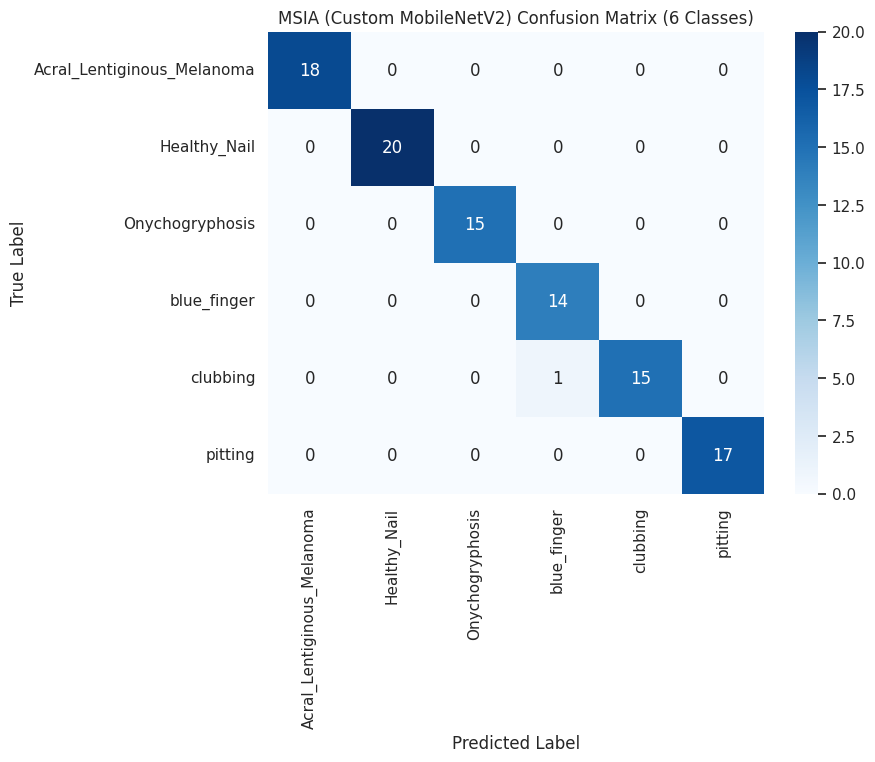


Classification Report for MSIA (Custom MobileNetV2):
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       1.00      1.00      1.00        18
              Healthy_Nail       1.00      1.00      1.00        20
           Onychogryphosis       1.00      1.00      1.00        15
               blue_finger       0.93      1.00      0.97        14
                  clubbing       1.00      0.94      0.97        16
                   pitting       1.00      1.00      1.00        17

                  accuracy                           0.99       100
                 macro avg       0.99      0.99      0.99       100
              weighted avg       0.99      0.99      0.99       100



In [61]:
# prompt: now mhmt model 6 classes

# --- MSIA (Custom MobileNetV2) Confusion Matrix ---
print("\nGenerating Confusion Matrix for MSIA (Custom MobileNetV2)...")

# Ensure test_generator is reset and has shuffle=False
test_generator.reset()
test_generator.shuffle = False

# Predict using the custom MobileNetV2 model
# Make sure `model` variable currently holds the TRAINED MSIA model.
# Based on your script flow, the variable `model` is redefined.
# You need to ensure that after training your MSIA model, the `model`
# variable points to *that specific trained model* before running this block.
# If not, you might need to re-create it and load weights or ensure the training
# for the MSIA model was the very last training block executed that updates `model`.

# Let's assume the variable `model` currently holds the TRAINED MSIA model.

# Get predictions
msia_preds = model.predict(test_generator, verbose=1)
msia_y_pred = np.argmax(msia_preds, axis=1)

# Get true labels (should be the same for all models if using the same test_generator)
msia_y_true = test_generator.classes

# Compute confusion matrix
msia_cm = confusion_matrix(msia_y_true, msia_y_pred)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(msia_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MSIA (Custom MobileNetV2) Confusion Matrix (6 Classes)')
plt.show()

# Classification Report for MSIA (Custom MobileNetV2)
print("\nClassification Report for MSIA (Custom MobileNetV2):")
print(classification_report(msia_y_true, msia_y_pred, target_names=class_labels))



Generating Confusion Matrix for VGG19...
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


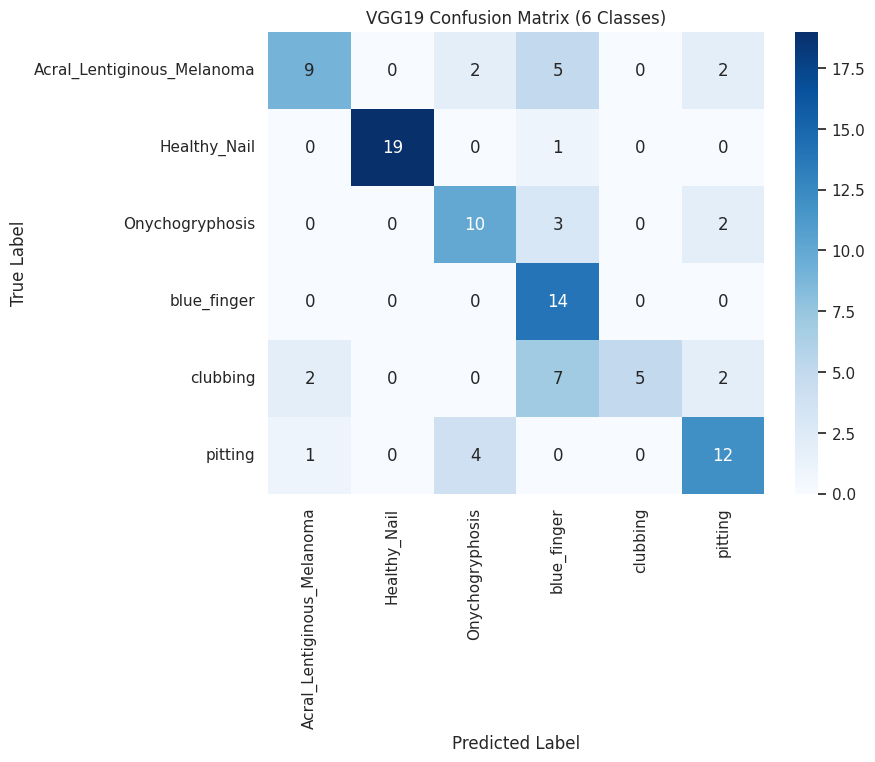


Classification Report for VGG19:
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.75      0.50      0.60        18
              Healthy_Nail       1.00      0.95      0.97        20
           Onychogryphosis       0.62      0.67      0.65        15
               blue_finger       0.47      1.00      0.64        14
                  clubbing       1.00      0.31      0.48        16
                   pitting       0.67      0.71      0.69        17

                  accuracy                           0.69       100
                 macro avg       0.75      0.69      0.67       100
              weighted avg       0.77      0.69      0.68       100



In [62]:
# prompt: now for generate vgg  confusion matrix

import seaborn as sns

# --- VGG19 Confusion Matrix ---
print("\nGenerating Confusion Matrix for VGG19...")

# Ensure test_generator is reset and has shuffle=False
test_generator.reset()
test_generator.shuffle = False

# Predict using the VGG19 model
# Make sure 'vgg_model' variable points to your trained VGG19 model.
# Based on your script, the VGG19 model is defined and trained using the variable `vgg_model`.

# Get predictions
vgg_preds = vgg_model.predict(test_generator, verbose=1)
vgg_y_pred = np.argmax(vgg_preds, axis=1)

# Get true labels (should be the same for all models if using the same test_generator)
# You already computed `y_true` earlier from test_generator.classes
# If you are running this section independently, you might need:
# vgg_y_true = test_generator.classes
# However, since `y_true` is defined in the preceding code, we'll use that.

# Compute confusion matrix
vgg_cm = confusion_matrix(y_true, vgg_y_pred)

# Get class labels (should be the same as before)
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(vgg_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('VGG19 Confusion Matrix (6 Classes)')
plt.show()

# Classification Report for VGG19
print("\nClassification Report for VGG19:")
print(classification_report(y_true, vgg_y_pred, target_names=class_labels))

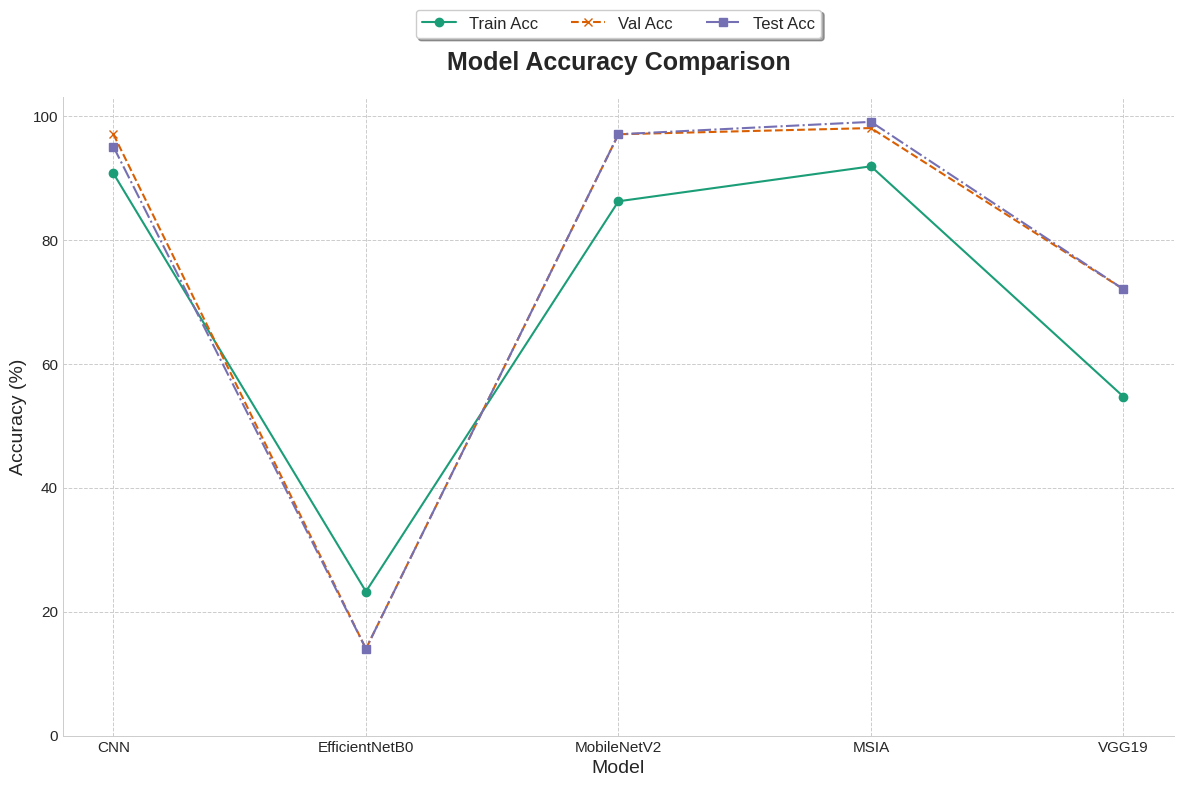

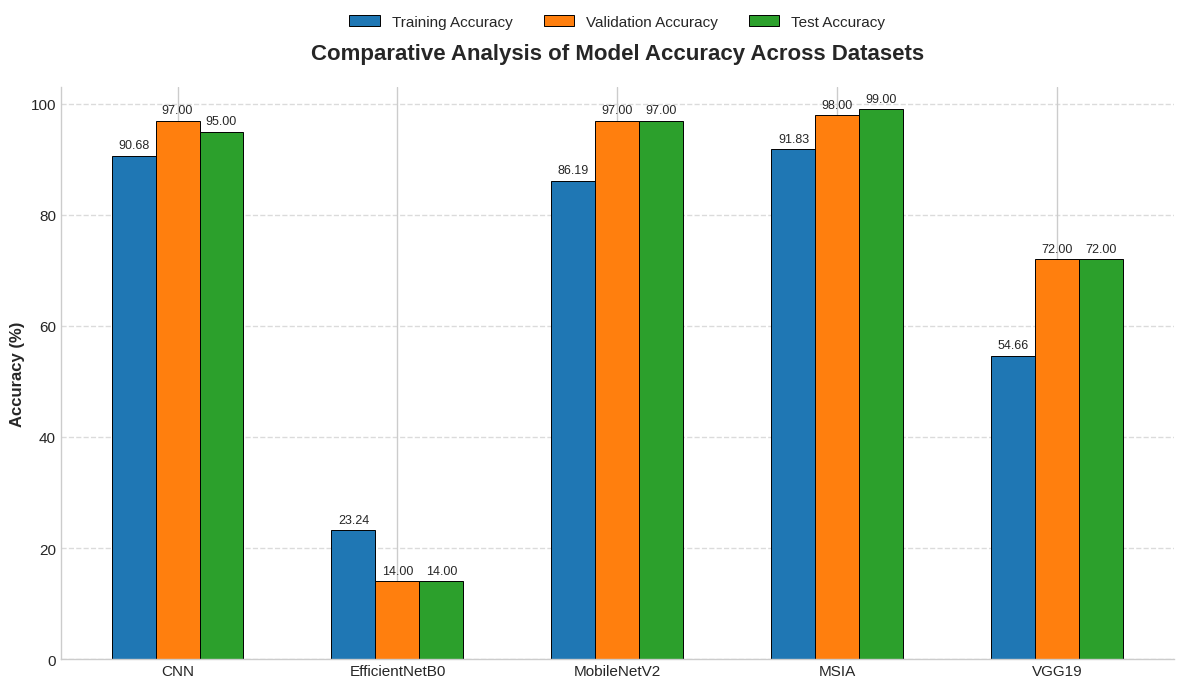

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style

style.use('seaborn-v0_8-whitegrid')

# Updated model performance data based on your new input
model_data = {
    "CNN": {
        "Train Acc": 90.68,
        "Val Acc": 97.00,
        "Test Acc": 95.00
    },
    "EfficientNetB0": {
        "Train Acc": 23.24,
        "Val Acc": 14.00,
        "Test Acc": 14.00
    },
    "MobileNetV2": {
        "Train Acc": 86.19,
        "Val Acc": 97.00,
        "Test Acc": 97.00
    },
    "MSIA": {
        "Train Acc": 91.83,
        "Val Acc": 98.00,
        "Test Acc": 99.00
    },
    "VGG19": {
        "Train Acc": 54.66,
        "Val Acc": 72.00,
        "Test Acc": 72.00
    }
}

# Extract data
model_names = list(model_data.keys())
train_acc = [data["Train Acc"] for data in model_data.values()]
val_acc = [data["Val Acc"] for data in model_data.values()]
test_acc = [data["Test Acc"] for data in model_data.values()]

# --- LINE PLOT ---
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Dark2.colors

ax.plot(model_names, train_acc, marker='o', linestyle='-', color=colors[0], label='Train Acc')
ax.plot(model_names, val_acc, marker='x', linestyle='--', color=colors[1], label='Val Acc')
ax.plot(model_names, test_acc, marker='s', linestyle='-.', color=colors[2], label='Test Acc')

ax.set_title('Model Accuracy Comparison', fontsize=18, pad=20, fontweight='bold')
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_ylim(0, 103)
ax.grid(True, which='both', linestyle='--', linewidth=0.7)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=True, fontsize=12, fancybox=True, shadow=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_linewidth(0.7)

plt.tight_layout()
plt.show()


# --- BAR PLOT ---
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(model_names))
width = 0.2

colors = {
    "train": "#1f77b4",
    "valid": "#ff7f0e",
    "test": "#2ca02c"
}

rects1 = ax.bar(x - width, train_acc, width, label='Training Accuracy', color=colors['train'], edgecolor='black', linewidth=0.7)
rects2 = ax.bar(x, val_acc, width, label='Validation Accuracy', color=colors['valid'], edgecolor='black', linewidth=0.7)
rects3 = ax.bar(x + width, test_acc, width, label='Test Accuracy', color=colors['test'], edgecolor='black', linewidth=0.7)

ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparative Analysis of Model Accuracy Across Datasets', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)

ax.legend(fontsize=11, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
ax.set_ylim(0, 103)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.show()


In [67]:
import sys
import numpy as np

# Function to estimate model size in megabytes
def get_model_size(model):
    param_size = 0
    for layer in model.weights:
        param_size += np.prod(layer.shape.as_list()) * 4  # assuming 4 bytes per float32
    return param_size / (1024 ** 2)

# List of your models using the variables that hold the trained models
# Based on the notebook state, 'model' holds the last trained MSIA model,
# and 'vgg_model' holds the trained VGG19 model.
# The initial CNN and EfficientNetB0 models were likely overwritten by subsequent
# assignments to the 'model' variable. We will analyze the last trained instances.
models = {
    'MSIA Model': model,  # Assuming 'model' holds the trained MSIA model
    'VGG19': vgg_model, # Assuming 'vgg_model' holds the trained VGG19 model
    # Note: The initial CNN, EfficientNetB0, and MobileNetV2 models
    # defined and trained earlier in the notebook were likely overwritten
    # by subsequent model definitions using the same 'model' variable.
    # Analyzing the 'model' variable again would show the MSIA model.
    # To analyze the other models, you would need to re-define and load their weights
    # or ensure the variables are uniquely named during training.
    # For this fix, we focus on the last defined models accessible via 'model' and 'vgg_model'.
}

# Print summary for each model
for name, model in models.items():
    print("=" * 80)
    print(f"Model: {name}")
    print("=" * 80)
    model.summary()

    # Count parameters and estimate size
    total_params = model.count_params()
    model_size = get_model_size(model)
    print(f"\nTotal Parameters: {total_params:,}")
    print(f"Estimated Model Size: {model_size:.2f} MB\n\n")

Model: MSIA Model


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,223,700 (77.15 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 132,878 (519.06 KB)


Total Parameters: 20,090,822
Estimated Model Size: 76.64 MB


Model: VGG19


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,223,700 (77.15 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 132,878 (519.06 KB)


Total Parameters: 20,090,822
Estimated Model Size: 76.64 MB




In [75]:

import sys
import numpy as np

# Function to estimate model size in megabytes
def get_model_size(model):
    param_size = 0
    for layer in model.weights:
        param_size += np.prod(layer.shape.as_list()) * 4  # assuming 4 bytes per float32
    return param_size / (1024 ** 2)

# List of your models using the variables that hold the trained models
# Based on the notebook state, 'model' holds the last trained MSIA model,
# and 'vgg_model' holds the trained VGG19 model.
# The initial CNN and EfficientNetB0 models were likely overwritten by subsequent
# assignments to the 'model' variable. We will analyze the last trained instances.
models = {
    'MSIA Model': model,  # Assuming 'model' holds the trained MSIA model
    'VGG19': vgg_model, # Assuming 'vgg_model' holds the trained VGG19 model
    # Note: The initial CNN, EfficientNetB0, and MobileNetV2 models
    # defined and trained earlier in the notebook were likely overwritten
    # by subsequent model definitions using the same 'model' variable.
    # Analyzing the 'model' variable again would show the MSIA model.
    # To analyze the other models, you would need to re-define and load their weights
    # or ensure the variables are uniquely named during training.
    # For this fix, we focus on the last defined models accessible via 'model' and 'vgg_model'.
}

# Print summary for each model
for name, model in models.items():
    print("=" * 80)
    print(f"Model: {name}")
    print("=" * 80)
    model.summary()

    # Count parameters and estimate size
    total_params = model.count_params()
    model_size = get_model_size(model)
    print(f"\nTotal Parameters: {total_params:,}")
    print(f"Estimated Model Size: {model_size:.2f} MB\n\n")





from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

# --- CNN model definition (same architecture you likely used earlier) ---
def create_cnn_model(input_shape=(224, 224, 3), num_classes=2):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

cnn_model = create_cnn_model()

# --- EfficientNetB0 model ---
efficientnet_model = EfficientNetB0(weights=None, include_top=True, classes=2, input_shape=(224, 224, 3))

# --- MobileNetV2 model ---
mobilenet_model = MobileNetV2(weights=None, include_top=True, classes=2, input_shape=(224, 224, 3))

# --- Function to estimate model size (reuse your earlier helper) ---
def get_model_size(model):
    param_size = 0
    for layer in model.weights:
        param_size += np.prod(layer.shape.as_list()) * 4  # assuming float32
    return param_size / (1024 ** 2)

# --- Combine all models ---
models = {
    'CNN': cnn_model,
    'EfficientNetB0': efficientnet_model,
    'MobileNetV2': mobilenet_model
}

# --- Print summaries ---
for name, model in models.items():
    print("=" * 80)
    print(f"Model: {name}")
    print("=" * 80)
    model.summary()

    total_params = model.count_params()
    model_size = get_model_size(model)
    print(f"\nTotal Parameters: {total_params:,}")
    print(f"Estimated Model Size: {model_size:.2f} MB\n\n")


Model: MSIA Model


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_19[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)


Total Parameters: 2,260,546
Estimated Model Size: 8.62 MB


Model: VGG19


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,223,700 (77.15 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 132,878 (519.06 KB)


Total Parameters: 20,090,822
Estimated Model Size: 76.64 MB


Model: CNN


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)


Total Parameters: 23,907,650
Estimated Model Size: 91.20 MB


Model: EfficientNetB0


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_7         │ (None, 224, 224,  │          0 │ input_layer_21[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_6     │ (None, 224, 224,  │          7 │ rescaling_7[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization_6[… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 4,010,110 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)


Total Parameters: 4,052,133
Estimated Model Size: 15.46 MB


Model: MobileNetV2


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_22[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)


Total Parameters: 2,260,546
Estimated Model Size: 8.62 MB


